In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data.shape

(1460, 81)

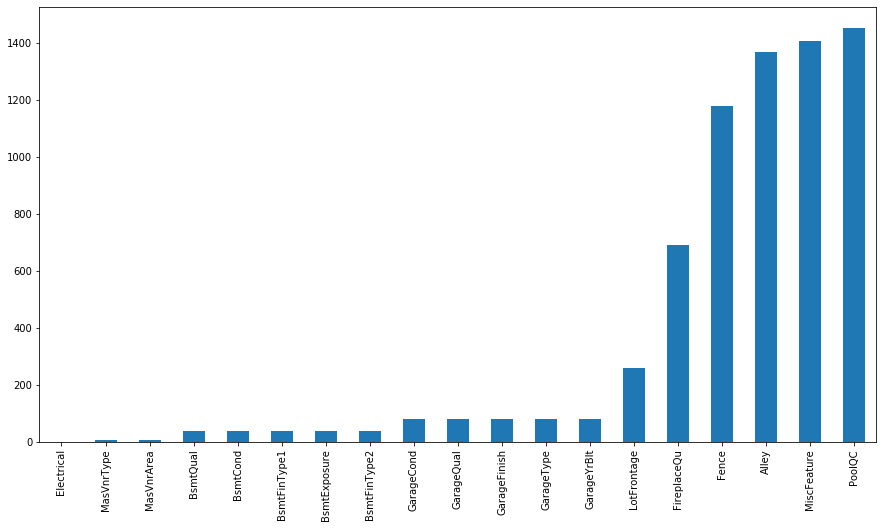

In [8]:
missing = data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

In [7]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Histogram and Seaborn

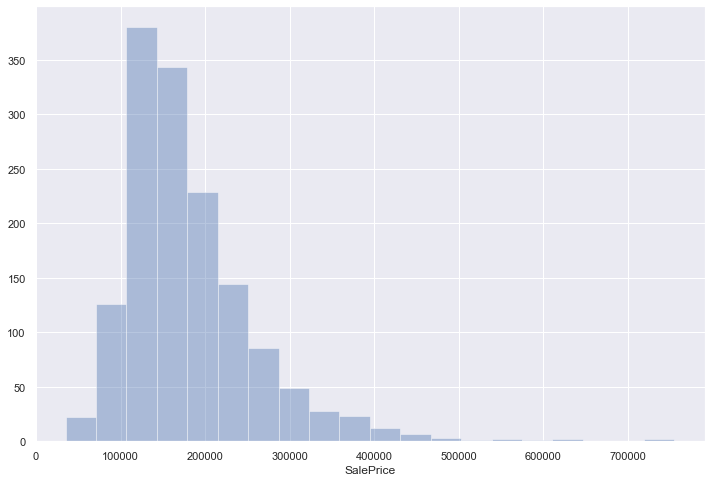

In [9]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data['SalePrice'],kde=False,bins=20)

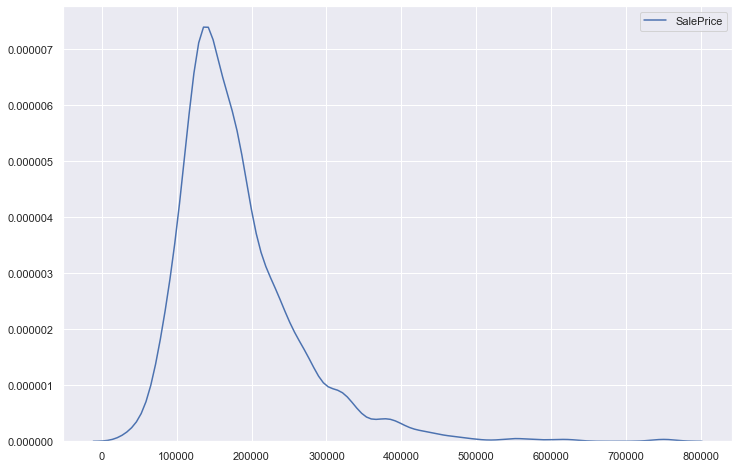

In [10]:
sns.kdeplot(data['SalePrice'])

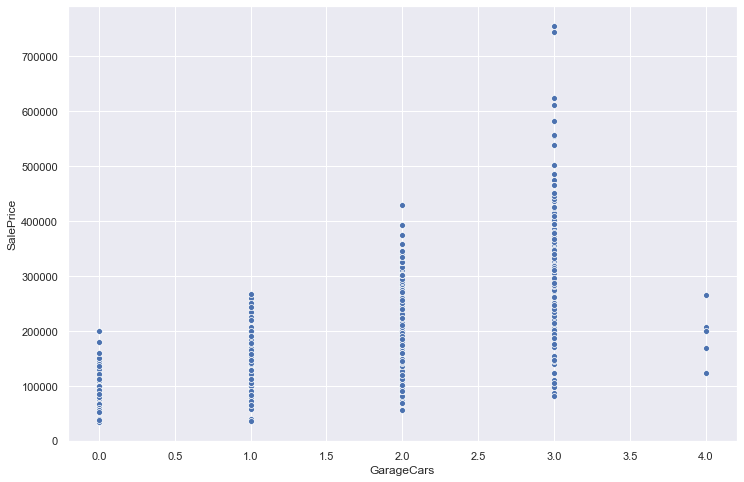

In [11]:
sns.scatterplot(x='GarageCars',y='SalePrice',data=data)

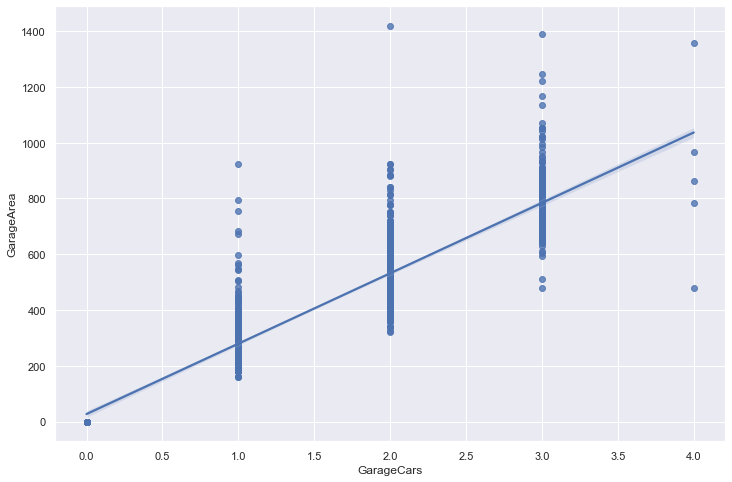

In [12]:
sns.regplot(x='GarageCars',y='GarageArea',data=data,scatter=True,fit_reg=True)

In [30]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Correlation and HeatMap

In [32]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.800000
GrLivArea        0.679068
GarageCars       0.653663
GarageArea       0.632507
TotalBsmtSF      0.594397
1stFlrSF         0.584448
YearBuilt        0.556740
FullBath         0.552082
YearRemodAdd     0.534765
GarageYrBlt      0.508040
TotRmsAbvGrd     0.502738
Fireplaces       0.461581
MasVnrArea       0.433622
BsmtFinSF1       0.364725
LotFrontage      0.336667
WoodDeckSF       0.334476
OpenPorchSF      0.325409
2ndFlrSF         0.287455
HalfBath         0.278858
LotArea          0.252031
BsmtFullBath     0.242846
BsmtUnfSF        0.211252
BedroomAbvGr     0.164610
ScreenPorch      0.081308
MoSold           0.079185
3SsnPorch        0.055720
PoolArea         0.033403
BsmtFinSF2      -0.011770
MiscVal         -0.019849
BsmtHalfBath    -0.031552
YrSold          -0.034292
Id              -0.034666
LowQualFinSF    -0.060257
OverallCond     -0.079676
MSSubClass      -0.086540
EnclosedPorch   -0.128520
KitchenAbvGr    -0.143610
Name: SalePr

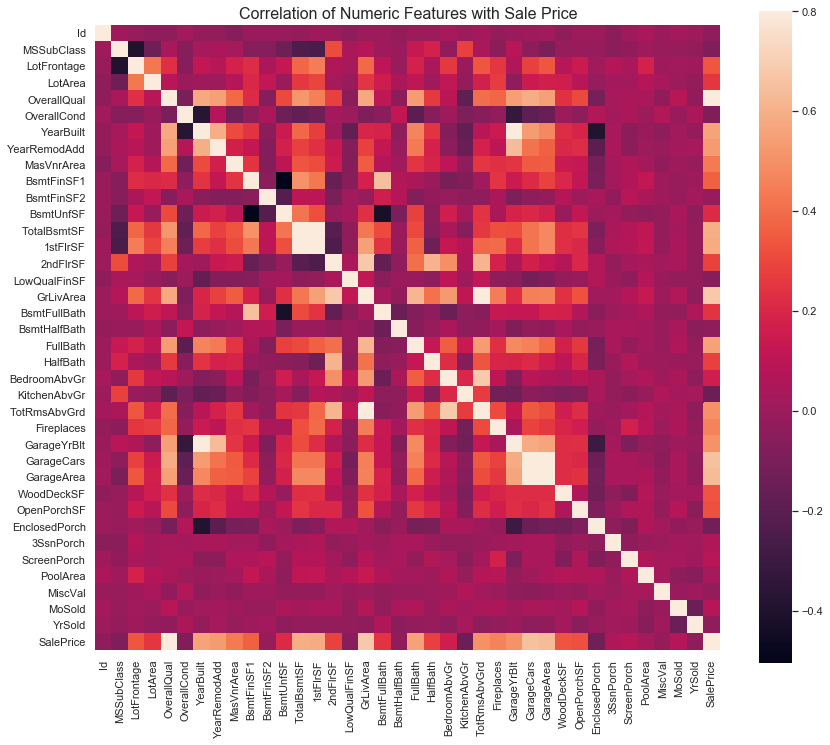

In [33]:
f ,ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd',
       'GarageYrBlt'],
      dtype='object')


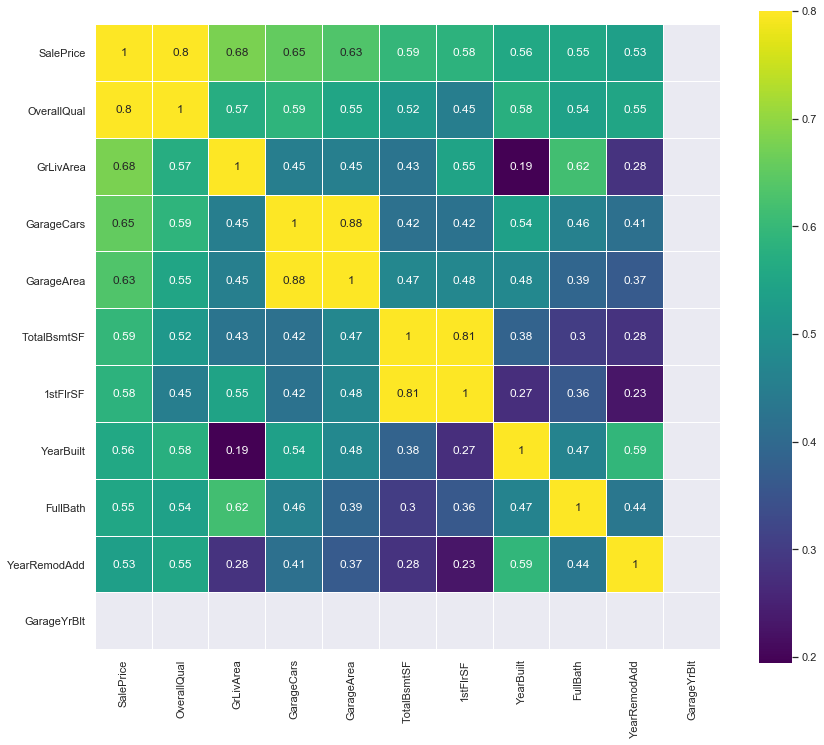

In [34]:
k=11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',
linecolor="white",xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)

# Scatterplot

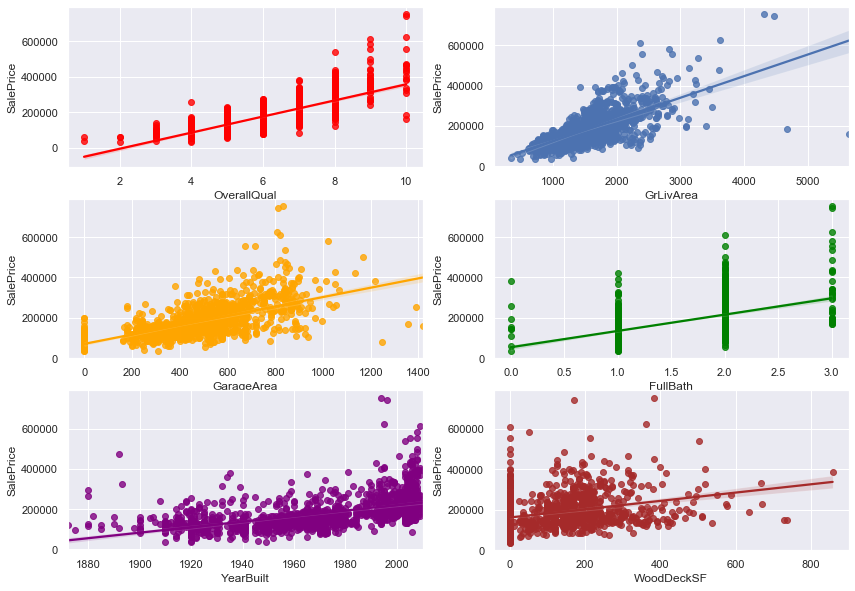

In [16]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(14,10))
sns.regplot(x='OverallQual',y='SalePrice',data=data,scatter=True,fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "red"},ax=ax1)
sns.regplot(x='GrLivArea',y='SalePrice',data=data,scatter=True,fit_reg=True,ax=ax2)
sns.regplot(x='GarageArea',y='SalePrice',data=data,scatter=True,scatter_kws={"color": "orange"}, line_kws={"color": "orange"},fit_reg=True,ax=ax3)
sns.regplot(x='FullBath',y='SalePrice',data=data,scatter=True,scatter_kws={"color": "green"}, line_kws={"color": "green"},fit_reg=True,ax=ax4)
sns.regplot(x='YearBuilt',y='SalePrice',data=data,scatter=True,scatter_kws={"color": "purple"}, line_kws={"color": "purple"},fit_reg=True,ax=ax5)
sns.regplot(x='WoodDeckSF',y='SalePrice',data=data,scatter=True,scatter_kws={"color": "brown"}, line_kws={"color": "brown"},fit_reg=True,ax=ax6)


# BoxPlot

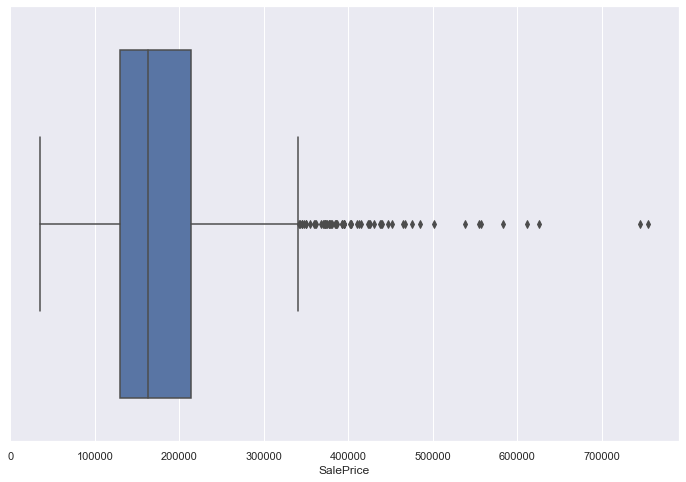

In [17]:
sns.boxplot(x=data["SalePrice"])

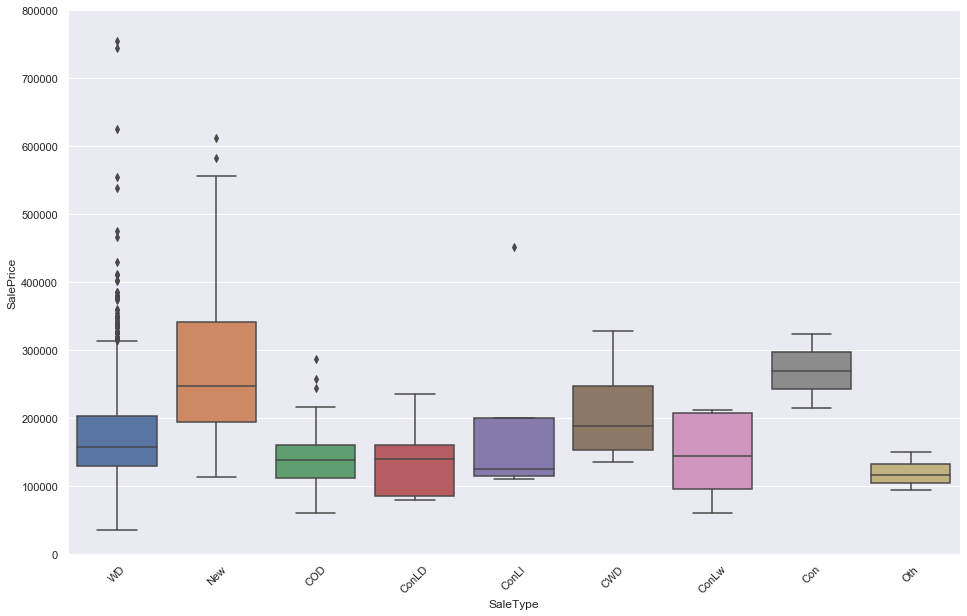

In [18]:
f, ax = plt.subplots(figsize=(16,10))
fig = sns.boxplot(x='SaleType',y='SalePrice',data=data)
fig.axis(ymin=0, ymax=800000)
xt = plt.xticks(rotation=45)

(-0.5, 9.5, 0, 800000)

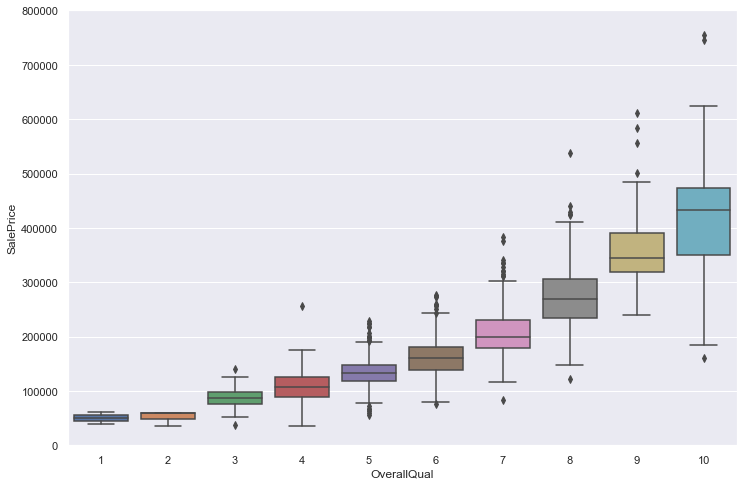

In [19]:
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x='OverallQual',y='SalePrice',data=data)
fig.axis(ymin=0, ymax=800000)

# Detecting Outliers

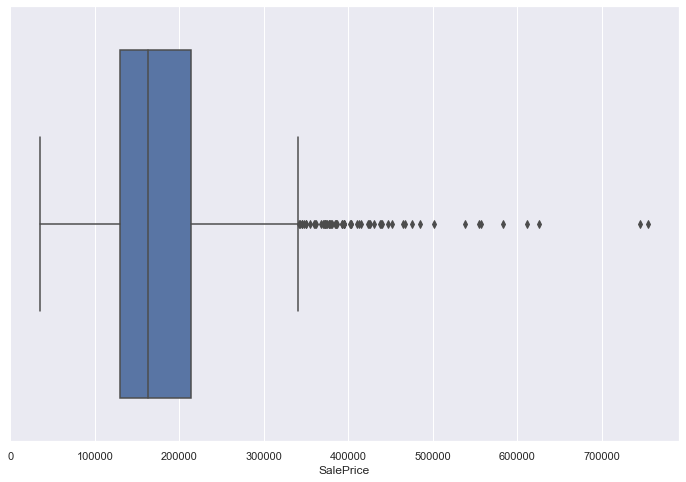

In [20]:
sns.boxplot(x=data["SalePrice"])

In [21]:
data.shape

(1460, 81)

In [22]:
firstQt = data['SalePrice'].quantile(.25)
thirdQt = data['SalePrice'].quantile(.75)
IQR = thirdQt - firstQt

In [23]:
new_boundary = thirdQt + 3*IQR

In [27]:
data.drop(data[data['SalePrice']>new_boundary].index,axis = 0,inplace=True)

In [29]:
data.shape

(1448, 81)

# Remove bad features from data

In [35]:
cols_to_remove = ['BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF',
'HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea',
'MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF','YrSold',
'OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr','FireplaceQu','Fence','Alley','MiscFeature',
'PoolQC','GarageCars','1stFlrSF','GrLivArea','FullBath']

In [36]:
data.drop(cols_to_remove,axis=1,inplace=True)

In [37]:
data.shape

(1448, 48)